In [214]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

In [215]:
rs = 123

# Model 1

In [216]:
data_hourly = pd.read_csv('../data/train_hourly.csv')
data_daily_mean = pd.read_csv('../data/train_daily_mean.csv')
# data_daily_mean = data_daily_mean.drop('Unnamed: 0', axis=1)

display(data_hourly.head())
display(data_daily_mean.head())

data = data_hourly

y = data.pop('target')
X = data.iloc[:, 2:-3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rs)

xgb = XGBRegressor()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

,ID,location,temp,rel_humidity,wind_dir,wind_spd,atmos_press,hours,day_x,target,day_y
0,ID_train_1,D,22.533333,0.744583,281.664310,2.377500,90.320000,0.0,1.0,79.131702,True
1,ID_train_1,D,21.716667,0.808083,89.156293,1.126667,90.377500,1.0,1.0,79.131702,True
2,ID_train_1,D,20.833333,0.911167,81.968539,0.700833,90.440833,2.0,1.0,79.131702,True
3,ID_train_1,D,20.983333,0.916333,291.018632,0.341667,90.472500,3.0,1.0,79.131702,True
4,ID_train_1,D,20.875000,0.929750,279.391524,0.440833,90.454167,4.0,1.0,79.131702,True


,ID,day,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press
0,ID_train_0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_train_0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_train_0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_train_0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_train_0,5.0,22.299527,0.0,0.75853,209.574655,0.677348,87.752434


In [217]:
print(mean_squared_error(y_test, y_pred, squared=False))

38.198850115191576


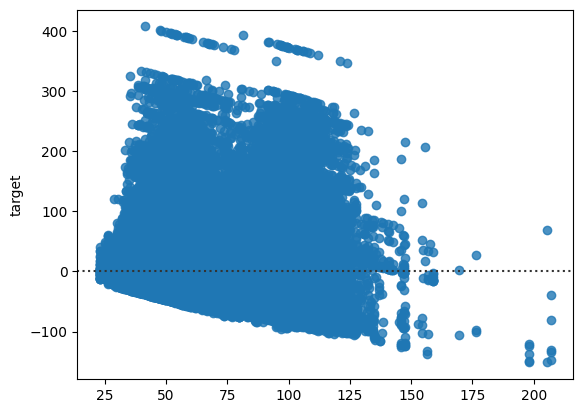

In [218]:
sns.residplot(x=y_pred, y=y_test);

# Model 2

1. wide data format
1. Include hours as features

In [219]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

In [220]:
# import data
df_train = pd.read_csv('../data/train_wide_with_hours.csv')

In [221]:
# quick look into the data
df_train.head(10)

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,windspeed119,atmospherepressure119,hour119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120,hour120
0,ID_train_0,C,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,...,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0
1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,...,1.475833,90.439167,120.0,21.450000,0.561,0.797333,296.967254,1.019167,90.529167,121.0
2,ID_train_10,A,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,...,NaN,88.415833,120.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0
3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,...,NaN,88.490833,120.0,24.641667,0.000,0.719667,NaN,NaN,88.465833,121.0
4,ID_train_1000,A,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,...,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0
5,ID_train_10000,E,17.005000,28.416667,17.183333,22.581950,2.822580,7.966956,22.316667,11.233333,...,NaN,88.525000,120.0,25.075000,0.000,0.773000,NaN,NaN,88.510000,121.0
6,ID_train_10001,C,53.100000,29.266667,19.116667,23.638430,2.785974,7.761652,22.925000,10.150000,...,0.684167,87.686667,120.0,19.508333,0.868,0.995833,207.023076,0.633333,87.663333,121.0
7,ID_train_10002,A,55.051143,29.483333,16.933333,22.624518,3.535216,12.497755,22.075000,12.550000,...,NaN,88.181667,120.0,18.975000,0.000,0.998500,NaN,NaN,88.175833,121.0
8,ID_train_10003,A,205.215333,27.741667,17.133333,20.744935,2.982612,8.895977,19.466667,10.608333,...,NaN,88.504167,120.0,18.483333,0.000,NaN,NaN,NaN,88.540833,121.0
9,ID_train_10004,B,25.580541,26.300000,19.016667,22.111310,2.061830,4.251142,21.716667,7.283333,...,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0


In [222]:
# define feature matrix X and target vector y
y = df_train.pop('target')
X = df_train.iloc[:, 51:]

In [223]:
# get all hour columns
drop_hours = [x for x in X.columns if 'hour' in x]

In [224]:
# drop all hour columns
X_wo_hours = X.drop(drop_hours, axis=1)

In [225]:
# create X_train, ... with and w/o hours as feature
def tts(features=X, target=y, test_size=0.33, rnd_state=rs):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=rnd_state)
    return X_train, X_test, y_train, y_test
    # X_train_wo_hours, X_test_wo_hours, y_train, y_test = train_test_split(X_wo_hours, y, test_size=0.33, random_state=rs)

In [226]:
# generate XGBoost object
xgb = XGBRegressor()

def xgboost(estimator, X_train, y_train, X_test):
    estimator.fit(X_train, y_train)
    return estimator.predict(X_test)

In [227]:
# fit and predict with hours as feature
X_train, X_test, y_train, y_test = tts(X, y, 0.33, rs)
y_preds = xgboost(xgb, X_train, y_train, X_test)

In [228]:
# fit and predict w/o hours as feature
X_train_wo_hours, X_test_wo_hours, y_train, y_test = tts(X_wo_hours, y, 0.33, rs)
y_preds_wo_hours = y_preds = xgboost(xgb, X_train_wo_hours, y_train, X_test_wo_hours)

In [229]:
# get RMSE for both models
print(f"RMSE with hours as feature: {mean_squared_error(y_test, y_preds, squared=False)}")
print(f"RMSE w/o hours as feature:  {mean_squared_error(y_test, y_preds_wo_hours, squared=False)}")

RMSE with hours as feature: 29.848021824137174
RMSE w/o hours as feature:  29.848021824137174


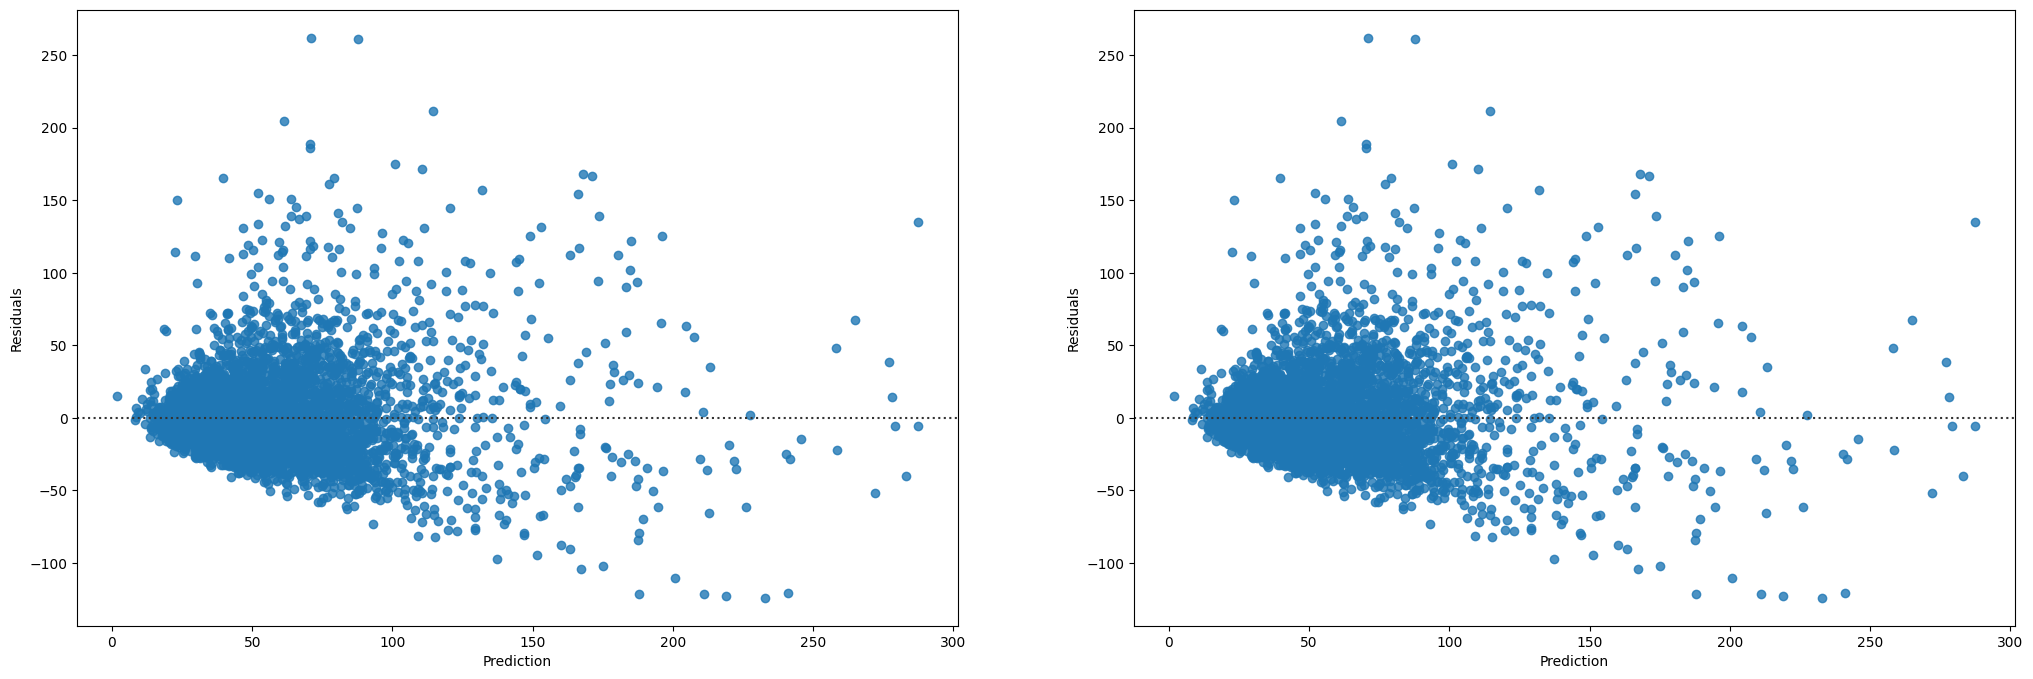

In [230]:
# visualize residual distribution 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(25, 8))

g1 = sns.residplot(x=y_preds, y=y_test, ax=ax[0])
g2 = sns.residplot(x=y_preds_wo_hours, y=y_test, ax=ax[1])

g1.set_ylabel('Residuals')
g1.set_xlabel('Prediction')
g2.set_ylabel('Residuals')
g2.set_xlabel('Prediction');

In [231]:
# drop nan containing rows
X_log = pd.read_csv('../data/train_wide_with_hours.csv')
# pop target into new variable
y_log = X_log.pop('target')
# take feature columns
X_log = X_log.iloc[:, 51:]
# add 1 to all feature values
X_log = X_log.apply(lambda x: x+1)
# take log10
X_log = np.log(X_log)
# check
X_log.head(10)

,newtemp0,newprecip0,newrel_humidity0,newwind_dir0,windspeed0,atmospherepressure0,hour0,newtemp1,newprecip1,newrel_humidity1,...,windspeed119,atmospherepressure119,hour119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120,hour120
0,3.328952,0.000000,0.412651,5.612773,0.588292,4.486131,0.693147,3.339617,0.0,0.428802,...,NaN,NaN,4.795791,NaN,NaN,NaN,NaN,NaN,NaN,4.804021
1,3.158418,0.097127,0.556516,5.644260,1.217136,4.514370,0.693147,3.123099,0.0,0.592267,...,0.906577,4.515674,4.795791,3.111291,0.445327,0.586304,5.696984,0.702685,4.516658,4.804021
2,3.400364,0.000000,0.453197,5.798131,0.709267,4.494816,0.693147,3.365570,0.0,0.468231,...,NaN,4.493298,4.795791,NaN,NaN,NaN,NaN,NaN,NaN,4.804021
3,3.176664,0.000000,0.611440,5.707393,0.894727,4.495523,0.693147,3.229486,0.0,0.582355,...,NaN,4.494136,4.795791,3.244219,0.000000,0.542130,NaN,NaN,4.493857,4.804021
4,3.130045,0.000000,0.618648,3.128512,0.180236,4.494872,0.693147,3.116843,0.0,0.628564,...,NaN,NaN,4.795791,NaN,NaN,NaN,NaN,NaN,NaN,4.804021
5,3.304136,0.000000,0.563418,4.657513,0.910608,4.494974,0.693147,3.305054,0.0,0.535957,...,NaN,4.494518,4.795791,3.260977,0.000000,0.572673,NaN,NaN,4.494350,4.804021
6,3.129680,0.000000,0.437179,5.814377,0.766630,4.485673,0.693147,3.108317,0.0,0.452137,...,0.521271,4.485110,4.795791,3.020831,0.624868,0.691062,5.337649,0.490623,4.484846,4.804021
7,3.375595,0.000000,0.423469,5.797460,1.073864,4.488796,0.693147,3.363842,0.0,0.415965,...,NaN,4.490675,4.795791,2.994481,0.000000,0.692397,NaN,NaN,4.490610,4.804021
8,2.999890,0.016857,0.680526,5.644131,0.360584,4.493503,0.693147,3.094068,0.0,0.657650,...,NaN,4.494285,4.795791,2.969559,0.000000,NaN,NaN,NaN,4.494695,4.804021
9,3.072693,0.000000,0.675724,5.195844,0.704746,4.500161,0.693147,3.119792,0.0,0.660107,...,NaN,NaN,4.795791,NaN,NaN,NaN,NaN,NaN,NaN,4.804021


In [232]:
# create X_log without hours as features:
X_log_wo_hours = X_log.drop(drop_hours, axis=1)

In [233]:
# create train test data with hours
X_train_log, X_test_log, y_train, y_test = tts(X_log, y, 0.33, rs)

# create train test data without hours
X_train_log_wo_hours, X_test_log_wo_hours, y_train, y_test = tts(X_log, y, 0.33, rs)

In [234]:
# get xgboost predictions with hours for log features
y_preds_log = xgboost(xgb, X_train_log, y_train, X_test_log)

In [235]:
# get xgboost predictions without hours for log features
y_preds_log_wo_hours = xgboost(xgb, X_train_log_wo_hours, y_train, X_test_log_wo_hours)

In [236]:
# print rmse
print(f"RMSE with log(features) with hours as feature: {mean_squared_error(y_test, y_preds_log, squared=False)}")
print(f"RMSE with log(features) w/o hours as feature:  {mean_squared_error(y_test, y_preds_log_wo_hours, squared=False)}")

RMSE with log(features) with hours as feature: 29.832676234339292
RMSE with log(features) w/o hours as feature:  29.832676234339292


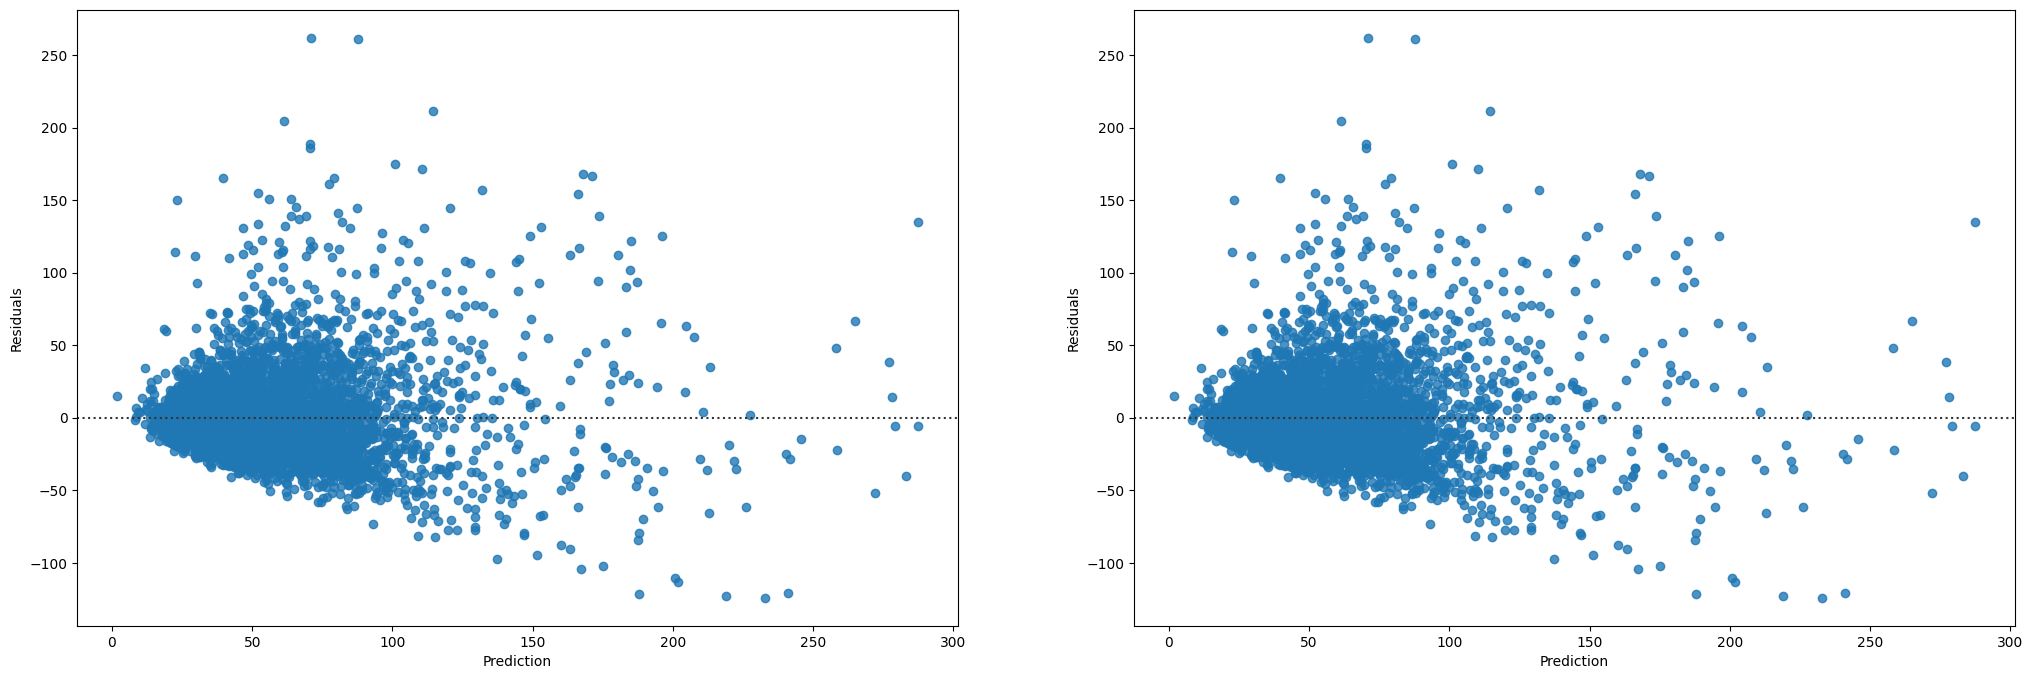

In [237]:
# plot residual distribution
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

g1 = sns.residplot(x=y_preds_log, y=y_test, ax=ax[0])
g2 = sns.residplot(x=y_preds_log_wo_hours, y=y_test, ax=ax[1])

g1.set_ylabel('Residuals')
g1.set_xlabel('Prediction')
g2.set_ylabel('Residuals')
g2.set_xlabel('Prediction');

# Problem: Heteroscedasticity

## Idea: transform target variable as well

In [238]:
y_train_log = np.log10(y_train)
y_test_log = np.log10(y_test)

In [239]:
# get xgboost predictions with hours for log features
y_log_preds_log = xgboost(xgb, X_train_log, y_train_log, X_test_log)

In [269]:
# print RMSE and RMSLE
from sklearn.metrics import mean_squared_log_error
print(f"RMSLE with log(features) with hours as feature and log(target): {mean_squared_log_error(y_test_log, y_log_preds_log, squared=False)}")
print(f"RMSE with log(features) with hours as feature and log(target):  {mean_squared_error(y_true=np.power(10, y_test_log), y_pred=np.power(10, y_log_preds_log), squared=False)}")

RMSLE with log(features) with hours as feature and log(target): 0.07257286395265107
RMSE with log(features) with hours as feature and log(target):  29.741536342057174


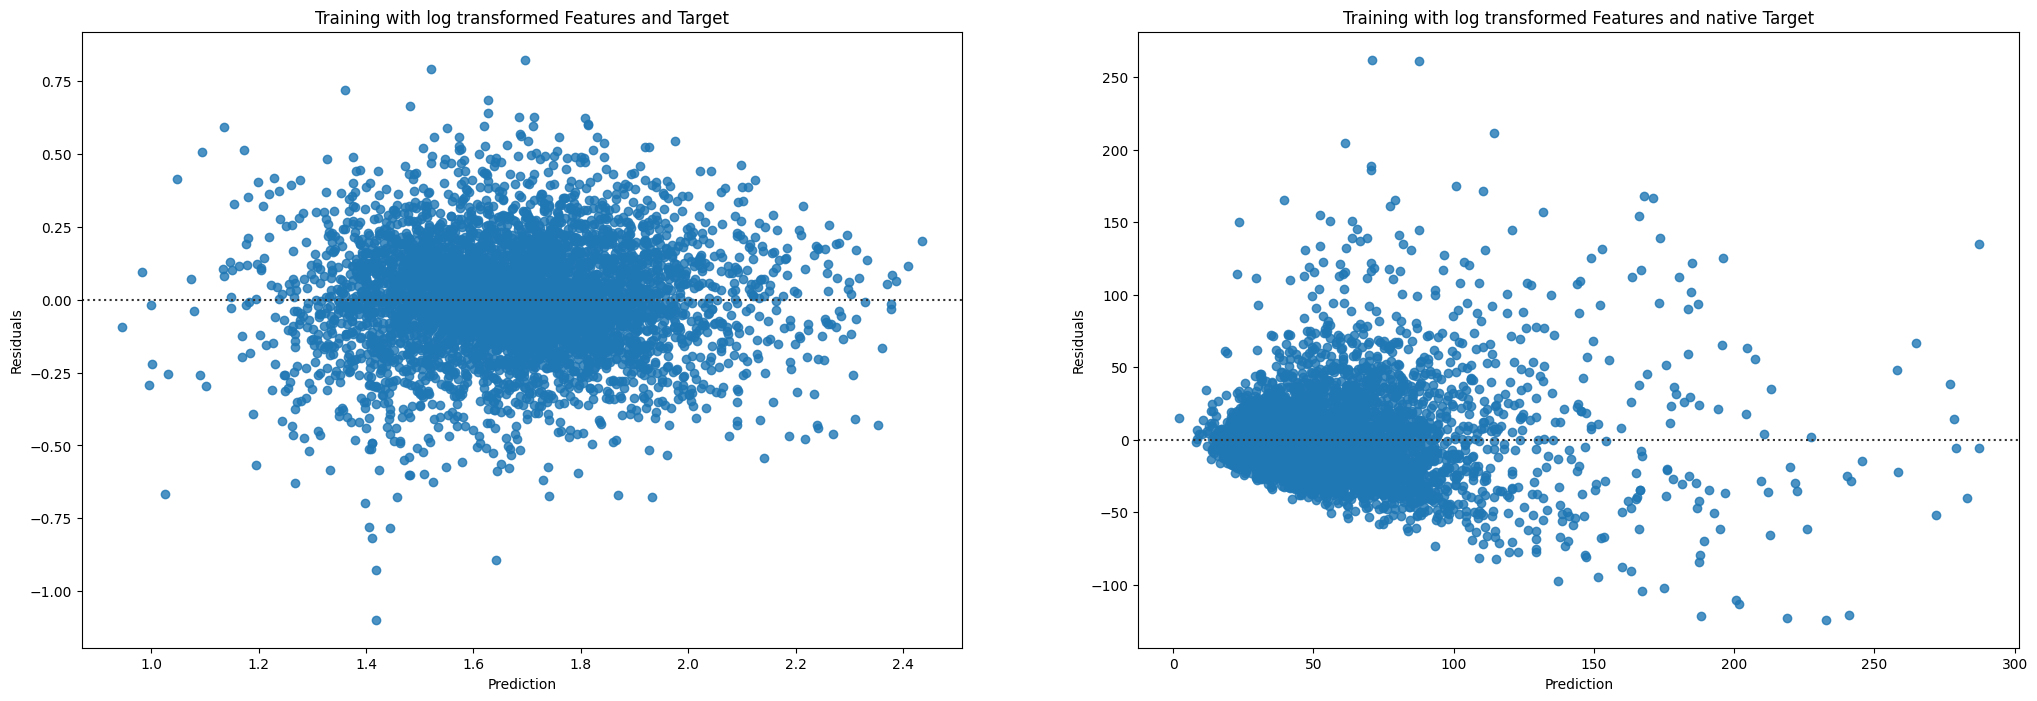

In [241]:
# plot residual distribution
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

g1 = sns.residplot(x=y_log_preds_log, y=y_test_log, ax=ax[0])
g2 = sns.residplot(x=y_preds_log, y=y_test, ax=ax[1])

g1.set_title('Training with log transformed Features and Target')
g2.set_title('Training with log transformed Features and native Target')

g1.set_ylabel('Residuals')
g1.set_xlabel('Prediction')
g2.set_ylabel('Residuals')
g2.set_xlabel('Prediction');

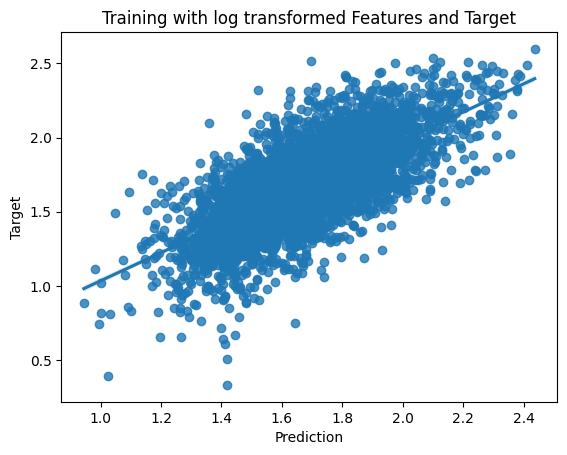

In [270]:
fig = sns.regplot(x=y_log_preds_log, y=y_test_log)
fig.set_title('Training with log transformed Features and Target')
fig.set_xlabel('Prediction')
fig.set_ylabel('Target');

# Return function for predictions

In [264]:
import numpy as np

def aq_bin(pred, islog: bool = False, base = 10) -> list:
    """Bins predicted PM2.5 values to air quality values

    Args:
        pred (numerical or list(numerical)): One or more predictions
        islog (bool)                       : whether predictions underwent log-transformation
        base (numerical)                   : base of log transformation. Defaults to 10.

    Returns:
        list: Air quality values:

            'Good': [0, 12],
            'Moderate': [13, 35],
            'Unhealthy for sensitive Groups': [36, 55],
            'Unhealthy': [56, 150],
            'Very unhealthy': [151, 250],
            'Hazardous': [251, infinity]
    """

    # mapping
    aq_map = {'Good': [0, 12],
              'Moderate': [13, 35],
              'Unhealthy for Sensitive Groups': [36, 55],
              'Unhealthy': [56, 150],
              'Very Unhealthy': [151, 250],
              'Hazardous': [251, np.inf]}

    # return list
    r = []
    
    # transform input to list
    if not type(pred) == list: 
        pred = list(pred)

    # if predictions where transformed (log), retransform
    if islog:
        pred = np.power(base, pred)

    # map predictions
    for p in pred:
        for key, val in aq_map.items():
            if int(p) >= val[0] and int(p) <= val[1]:
                r.append([key, p])
    
    # return bins
    return r

In [266]:
aq_bin(y_log_preds_log, True, 10)

[['Unhealthy', 123.316666],
 ['Unhealthy', 74.693825],
 ['Unhealthy for Sensitive Groups', 44.34395],
 ['Unhealthy', 103.83325],
 ['Unhealthy', 71.74454],
 ['Moderate', 35.48564],
 ['Unhealthy', 91.57408],
 ['Unhealthy for Sensitive Groups', 52.845676],
 ['Unhealthy', 84.205696],
 ['Unhealthy for Sensitive Groups', 42.04247],
 ['Unhealthy', 133.1053],
 ['Unhealthy', 64.80536],
 ['Unhealthy', 61.91955],
 ['Unhealthy for Sensitive Groups', 54.72539],
 ['Unhealthy for Sensitive Groups', 45.927864],
 ['Moderate', 35.030964],
 ['Unhealthy', 57.468258],
 ['Unhealthy', 73.06126],
 ['Moderate', 26.480703],
 ['Unhealthy', 60.738102],
 ['Moderate', 34.578796],
 ['Moderate', 14.568896],
 ['Unhealthy for Sensitive Groups', 48.893185],
 ['Unhealthy for Sensitive Groups', 42.603596],
 ['Moderate', 26.793947],
 ['Moderate', 31.292747],
 ['Unhealthy', 78.13095],
 ['Unhealthy for Sensitive Groups', 46.734764],
 ['Unhealthy for Sensitive Groups', 40.667744],
 ['Unhealthy', 57.17552],
 ['Unhealthy for Se

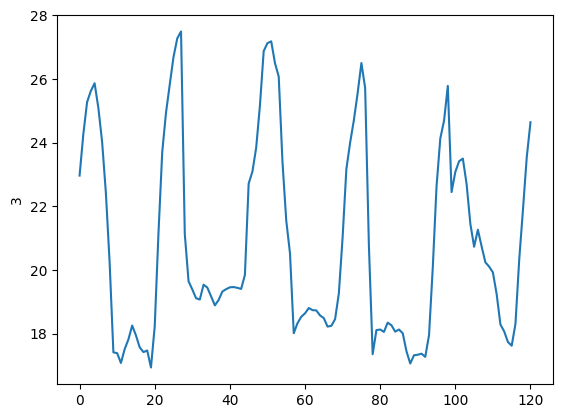

In [290]:
temp_cols = [x for x in df_train.columns if 'newtemp' in x]
y_temp = df_train[temp_cols]
y_temp = y_temp.iloc[3, :]
sns.lineplot(x=list(range(121)), y=y_temp);